In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Indlæsning af data

In [3]:
df = pd.read_csv('../data/Data_Train.csv')
df.sample(5)

,Airline,Date_of_Journey,Source,Dep_Time,Destination,Class,Price
6004,IndiGo,27/03/2019,Delhi,06:40,Cochin,0,6442
7545,Jet Airways,6/05/2019,Banglore,15:15,Delhi,0,7229
2415,SpiceJet,18/05/2019,Mumbai,22:45,Hyderabad,0,1965
5179,SpiceJet,12/05/2019,Banglore,05:55,Delhi,0,3311
2069,Jet Airways,9/06/2019,Kolkata,20:00,Banglore,0,10844


Vi har importeret dataene og lavet en hurtig gennemgang for at få et overblik over datasættet. Nu går vi videre med at forberede og rense dataene, så de er klar til analyse.

# Rensning af data

In [6]:
# Tjekker for manglende værdier
print("Tjekker for manglende værdier:")
print(df.isnull().sum())

# Tjekker for NaN-værdier
print("Tjekker for NaN-værdier:")
print(df.isna().sum())

# Tjekker for datatyper
print("Tjekker for datatyper:")
print(df.info())

# Tjekker for duplikater
print("Tjekker for duplikater:")
print(df.duplicated().sum()) 

Tjekker for manglende værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for NaN-værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for datatyper:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Destination      10683 non-null  object
 5   Class            10683 non-null  int64 
 6   Price            10683 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 584.4+ KB
None
Tjekker for duplikater:
2001


In [7]:
# Finder alle rækker der er identiske med mindst én anden (keep=False viser ALLE forekomster)
fulde_duplikater = df[df.duplicated(keep=False)]

# Udskriver samlet antal duplikerede rækker
print("Antal fuldstændige duplikatrækker (inkl. kopier):", fulde_duplikater.shape[0])

# Viser et par eksempler på de duplikerede rækker
print("\nEksempler på duplikerede rækker:")
print(fulde_duplikater.head())

# Tæller hvor mange af disse er faktiske kopier (ikke første forekomst)
antal_egentlige_duplikater = df[df.duplicated(keep=False)].duplicated().sum()
print("\nAntal gentagelser (egentlige duplikater):", antal_egentlige_duplikater)

# Tjekker hvor mange unikke rækker er det der gentages?
unikke_rækker = fulde_duplikater.drop_duplicates()
print("Antal unikke rækker blandt de duplikerede:", unikke_rækker.shape[0])

# Eksempel 1: Række 2
print("\nForekomster af række 2:")
print(df[df.eq(df.loc[2]).all(axis=1)])

# Eksempel 2: Række 6
print("\nForekomster af række 6:")
print(df[df.eq(df.loc[6]).all(axis=1)])

Antal fuldstændige duplikatrækker (inkl. kopier): 3192

Eksempler på duplikerede rækker:
        Airline Date_of_Journey    Source Dep_Time Destination  Class  Price
2   Jet Airways       9/06/2019     Delhi    09:25      Cochin      0  13882
6   Jet Airways      12/03/2019  Banglore    18:55   New Delhi      0  11087
7   Jet Airways      01/03/2019  Banglore    08:00   New Delhi      0  22270
13  Jet Airways       9/05/2019   Kolkata    21:10    Banglore      0   9663
17  Jet Airways      12/06/2019     Delhi    14:00      Cochin      0  10262

Antal gentagelser (egentlige duplikater): 2001
Antal unikke rækker blandt de duplikerede: 1191

Forekomster af række 2:
          Airline Date_of_Journey Source Dep_Time Destination  Class  Price
2     Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882
5375  Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882

Forekomster af række 6:
          Airline Date_of_Journey    Source Dep_Time Destination  Class  Pr

In [8]:
# Fjerner duplikaterne fra datasættet for at sikre, at kun unikke observationer er tilbage
df = df.drop_duplicates()
print("Datasættets nye størrelse efter sletning af duplikater:", df.shape)

Datasættets nye størrelse efter sletning af duplikater: (8682, 7)


Datasættet indeholder ikke nogen manglende værdier, hverken som NaN eller null. Datatyperne består hovedsageligt af tekst (object), som vi vil konvertere til string, samt nogle numeriske kolonner, der er defineret som heltal (int64) og decimaltal (float64).

Datasættet indeholder en del duplikater, hvor nogle rækker er præcist ens. Selvom duplikater kan være nyttige i nogle analyser, har vi valgt at fjerne dem her. Det gør vi for at sikre, at hver række i datasættet bidrager unikt til vores analyser og modeller. Ved at fjerne duplikaterne undgår vi, at nogle observationer får for stor vægt i analysen, hvilket kan påvirke resultaterne. Dette er vigtigt, både for lineær regression og andre statistiske analyser og maskinlæringsmodeller.

Nu opdeles datasættet i to separate dataframes: en med numeriske værdier og en med nominelle (kategoriske) data, da det bliver lettere at arbejde med disse typer.

In [10]:
# Fjerner 'Dep_Time' kolonnen, da den ikke er relevant for analysen
df.drop(['Dep_Time'], axis=1, inplace=True)

# Koncerteringer 

In [12]:
# Konverterer 'Date_of_Journey' til datetime format for at gøre videre analyse nemmere
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y') 

# Opretter en ny kolonne 'Journey_month' som indeholder måneden fra 'Date_of_Journey'
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_month'] = df['Journey_month'].astype('int64')  # Sikrer datatypen som int64 for konsistens

In [13]:
# Konvertering af dato og opdeling i dag og måned
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month

# Tilføj kolonne der viser om rejsen er i weekenden
df['is_weekend'] = df['Date_of_Journey'].dt.dayofweek >= 5

# Se de nye kolonner i datasættet
print(df[['Date_of_Journey', 'Journey_day', 'Journey_month', 'is_weekend']].head(10))

  Date_of_Journey  Journey_day  Journey_month  is_weekend
0      2019-03-24           24              3        True
1      2019-05-01            1              5       False
2      2019-06-09            9              6        True
3      2019-05-12           12              5        True
4      2019-03-01            1              3       False
5      2019-06-24           24              6       False
6      2019-03-12           12              3       False
7      2019-03-01            1              3       False
8      2019-03-12           12              3       False
9      2019-05-27           27              5       False


In [14]:
# Konverter 'date_of_journey' til datetime-format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

# Ekstraher dag og ugenummer
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_week'] = df['Date_of_Journey'].dt.isocalendar().week

# Tjek eksempel
df[['Date_of_Journey', 'Journey_day', 'Journey_week', 'Journey_month']].sample(5)

,Date_of_Journey,Journey_day,Journey_week,Journey_month
6224,2019-03-09,9,10,3
261,2019-03-03,3,9,3
2306,2019-04-06,6,14,4
1578,2019-03-12,12,11,3
2828,2019-05-15,15,20,5


In [15]:
# Udfører one-hot encoding på de kategoriske kolonner for at gøre dem numeriske og lettere at regressere på
dfNumeric = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Date_of_Journey'], dtype=pd.Int64Dtype())

# Sørger for at alle kolonner vises i output, så man kan verificere one-hot encoding
pd.set_option('display.max_columns', None)

# Viser 5 tilfældige rækker af det transformerede datasæt
dfNumeric.sample(5)

,Class,Price,Journey_month,Journey_day,is_weekend,Journey_week,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Date_of_Journey_2019-03-01 00:00:00,Date_of_Journey_2019-03-03 00:00:00,Date_of_Journey_2019-03-06 00:00:00,Date_of_Journey_2019-03-09 00:00:00,Date_of_Journey_2019-03-12 00:00:00,Date_of_Journey_2019-03-15 00:00:00,Date_of_Journey_2019-03-18 00:00:00,Date_of_Journey_2019-03-21 00:00:00,Date_of_Journey_2019-03-24 00:00:00,Date_of_Journey_2019-03-27 00:00:00,Date_of_Journey_2019-04-01 00:00:00,Date_of_Journey_2019-04-03 00:00:00,Date_of_Journey_2019-04-06 00:00:00,Date_of_Journey_2019-04-09 00:00:00,Date_of_Journey_2019-04-12 00:00:00,Date_of_Journey_2019-04-15 00:00:00,Date_of_Journey_2019-04-18 00:00:00,Date_of_Journey_2019-04-21 00:00:00,Date_of_Journey_2019-04-24 00:00:00,Date_of_Journey_2019-04-27 00:00:00,Date_of_Journey_2019-05-01 00:00:00,Date_of_Journey_2019-05-03 00:00:00,Date_of_Journey_2019-05-06 00:00:00,Date_of_Journey_2019-05-09 00:00:00,Date_of_Journey_2019-05-12 00:00:00,Date_of_Journey_2019-05-15 00:00:00,Date_of_Journey_2019-05-18 00:00:00,Date_of_Journey_2019-05-21 00:00:00,Date_of_Journey_2019-05-24 00:00:00,Date_of_Journey_2019-05-27 00:00:00,Date_of_Journey_2019-06-01 00:00:00,Date_of_Journey_2019-06-03 00:00:00,Date_of_Journey_2019-06-06 00:00:00,Date_of_Journey_2019-06-09 00:00:00,Date_of_Journey_2019-06-12 00:00:00,Date_of_Journey_2019-06-15 00:00:00,Date_of_Journey_2019-06-18 00:00:00,Date_of_Journey_2019-06-21 00:00:00,Date_of_Journey_2019-06-24 00:00:00,Date_of_Journey_2019-06-27 00:00:00
10162,0,7303,3,24,True,12,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
743,0,14441,6,12,False,24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3431,0,8085,5,9,False,19,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6109,0,4668,6,12,False,24,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7748,0,4326,3,24,True,12,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Konverterer alle 'object'-kolonner til 'string'-type
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

# Tjekker datatyperne efter konvertering
df.dtypes

Airline            string[python]
Date_of_Journey    datetime64[ns]
Source             string[python]
Destination        string[python]
Class                       int64
Price                       int64
Journey_month               int32
Journey_day                 int32
is_weekend                   bool
Journey_week               UInt32
dtype: object

# Dataudforskning

In [18]:
df.describe()

,Date_of_Journey,Class,Price,Journey_month,Journey_day,Journey_week
count,8682,8682.0,8682.000000,8682.000000,8682.000000,8682.0
mean,2019-05-04 12:20:24.049758208,0.0,8434.731283,4.695001,13.601014,18.367196
min,2019-03-01 00:00:00,0.0,1759.000000,3.000000,1.000000,9.0
25%,2019-03-27 00:00:00,0.0,4823.000000,3.000000,6.000000,13.0
50%,2019-05-15 00:00:00,0.0,7229.000000,5.000000,12.000000,20.0
75%,2019-06-06 00:00:00,0.0,11410.000000,6.000000,21.000000,23.0
max,2019-06-27 00:00:00,0.0,79512.000000,6.000000,27.000000,26.0
std,NaN,0.0,4605.337734,1.164916,8.537199,5.244065


Date_of_Journey: Datoerne Strækker sig fra 1. marts til 27. juni 2019, med median omkring midt i maj.

Price: Priserne varierer fra 1.759 til 79.512, med en gennemsnitlig pris på ca. 8.435.

Journey_month: Rejserne fordeler sig over månederne marts (3) til juni (6), med flest rejser omkring april–maj (gennemsnit 4,7).

Der er stor variation i priserne, hvilket sandsynligvis skyldes forskelle i sæson, rejseklasse og flyselskab.

Standardafvigelsen vises som NaN for datoer, da det ikke er beregnbar, da det er en datetime-værdi

In [20]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Class', 'Price',
       'Journey_month', 'Journey_day', 'is_weekend', 'Journey_week'],
      dtype='object')

Vi kan se, at dataene allerede er forholdsvis standardiserede, men lad os konvertere kolonnenavnene til at bruge "x-y" i stedet for "x_y" for at demonstrere muligheden for at forberede data.

In [22]:
import gc

dfStan = df.copy()

# Skifter kolonnenavne til store bogstaver og erstatter "_" med "-"
dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

del dfStan

# Kører garbage collection for at rydde op i hukommelsen
gc.collect()

Index(['AIRLINE', 'DATE-OF-JOURNEY', 'SOURCE', 'DESTINATION', 'CLASS', 'PRICE',
       'JOURNEY-MONTH', 'JOURNEY-DAY', 'IS-WEEKEND', 'JOURNEY-WEEK'],
      dtype='object')


0

Som nævnt foretager vi ikke en permanent ændring af kolonnenavnene i datasættet, men viser blot, hvordan det kan gøres. 

Vi vælger dog at konvertere kolonnenavnene til små bogstaver, da det giver et pænere, mere ensartet og læsevenligt datasæt.

In [24]:
# Skifter kolonnenavne til små bogstaver 
df.columns = [col.lower() for col in df.columns]

print(df.columns)

Index(['airline', 'date_of_journey', 'source', 'destination', 'class', 'price',
       'journey_month', 'journey_day', 'is_weekend', 'journey_week'],
      dtype='object')


For at opnå en bedre forståelse af prisdataenes fordeling udfører vi først grundlæggende visualiseringer.

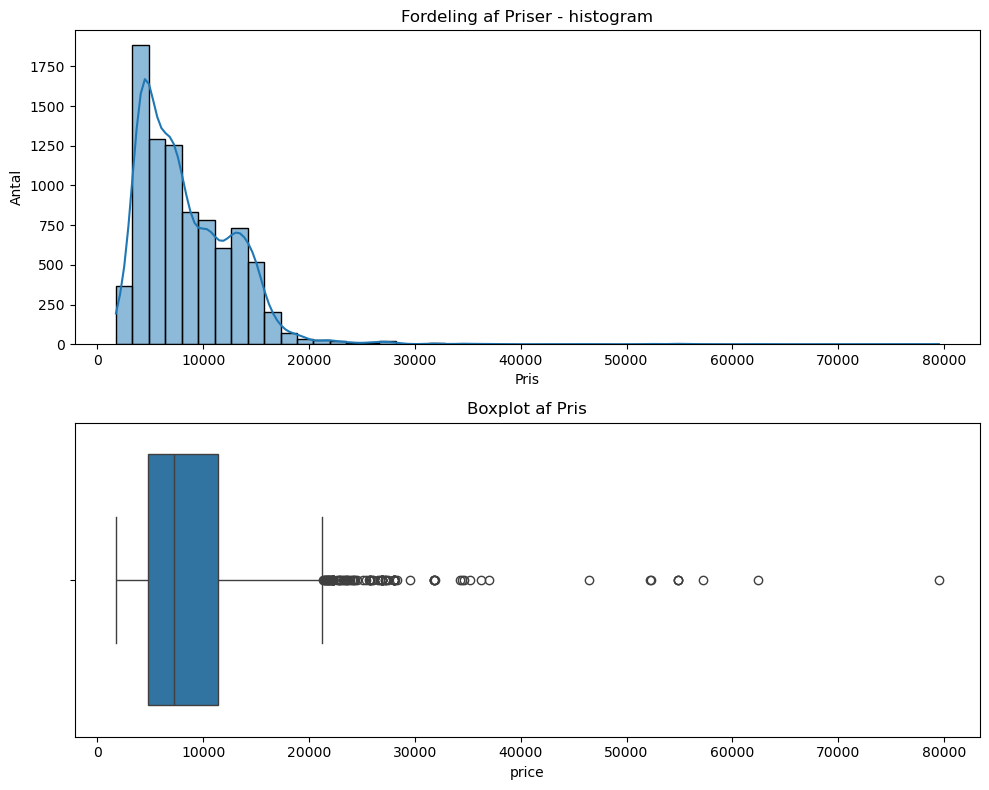

Skævhed (Skewness): 2.24303381701942
Kurtosis: 17.0167794296372
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er spidsere end en normalfordeling (høj kurtosis).


In [26]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram med KDE øverst
plt.subplot(2, 1, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Fordeling af Priser - histogram')
plt.ylabel('Antal')
plt.xlabel('Pris')

# Boxplot nederst
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot af Pris')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis
skewness = skew(df['price'].dropna())
kurt = kurtosis(df['price'].dropna())

print(f"Skævhed (Skewness): {skewness}")
print(f"Kurtosis: {kurt}")

if skewness > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")


Fordelingen er højreskæv (positiv skævhed), hvilket betyder, at der er flere lavere værdier, og den højre hale af fordelingen er længere.

Fordelingen har også høj kurtosis, hvilket indikerer, at dataene er spidsere end en normalfordeling, og der er flere ekstreme værdier (outliers) end vi ville forvente i en normalfordeling. Dette tyder på, at vores data kan indeholde nogle ekstreme observationer, som vi vil fjerne ved hjælp af z-score teknikken for at forbedre modellens præcision.

In [28]:
from z_score import beregnDataFrame, hentOutliers

# Beregner 1. og 3. kvartil for 'price' for at bestemme IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Beregner Interkvartilafstand (IQR)
IQR = Q3 - Q1

# Definerer nedre og øvre grænser for acceptable priser baseret på IQR-metoden
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrerer data for at fjerne outliers baseret på IQR-reglen
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

# Anvender z-score metode til yderligere at identificere outliers i pris (uden at fjerne dem endnu)
_ = beregnDataFrame(df_no_outliers[['price']], tærskel=3.0, fjern=False)

# Henter listen over outliers fundet via z-score metoden
price_outliers = hentOutliers()

# Fjerner rækker i datasættet hvor 'price' matcher outliers identificeret med z-score
df_final = df_no_outliers[~df_no_outliers['price'].isin(price_outliers)].copy()


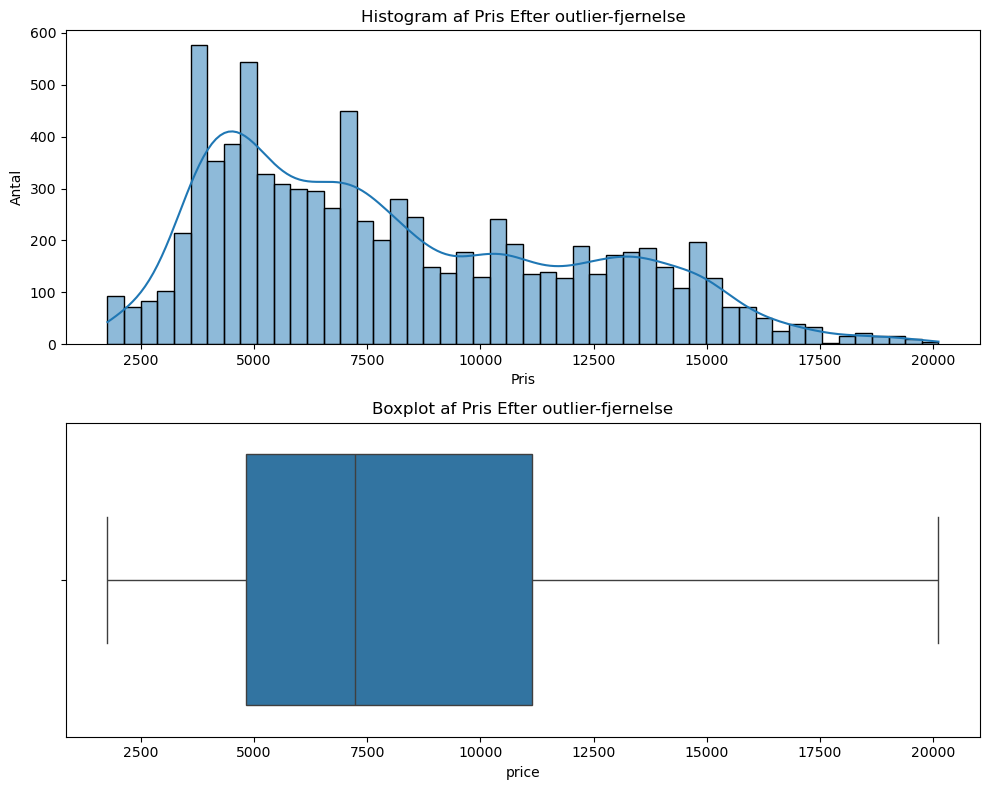

Skævhed (Skewness): 0.60
Kurtosis: -0.62
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er fladere end en normalfordeling (lav kurtosis).


In [29]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram efter outlier-fjernelse
plt.subplot(2, 1, 1)
sns.histplot(df_final['price'], kde=True, bins=50)
plt.title('Histogram af Pris Efter outlier-fjernelse')
plt.xlabel('Pris')
plt.ylabel('Antal')

# Boxplot efter outlier-fjernelse
plt.subplot(2, 1, 2)
sns.boxplot(x=df_final['price'])
plt.title('Boxplot af Pris Efter outlier-fjernelse')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis efter outlier-fjernelse
skewness_after = skew(df_final['price'].dropna())
kurt_after = kurtosis(df_final['price'].dropna())

print(f"Skævhed (Skewness): {skewness_after:.2f}")
print(f"Kurtosis: {kurt_after:.2f}")

if skewness_after > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness_after < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt_after > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt_after < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")

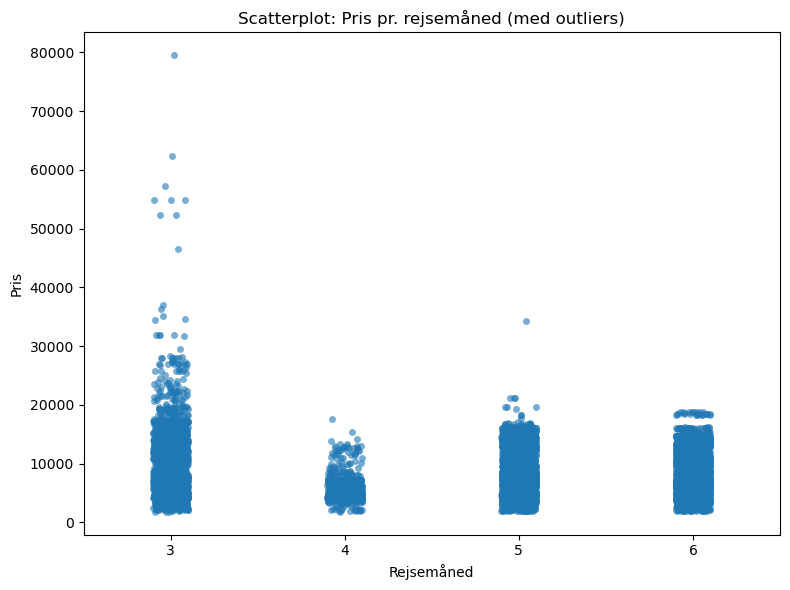

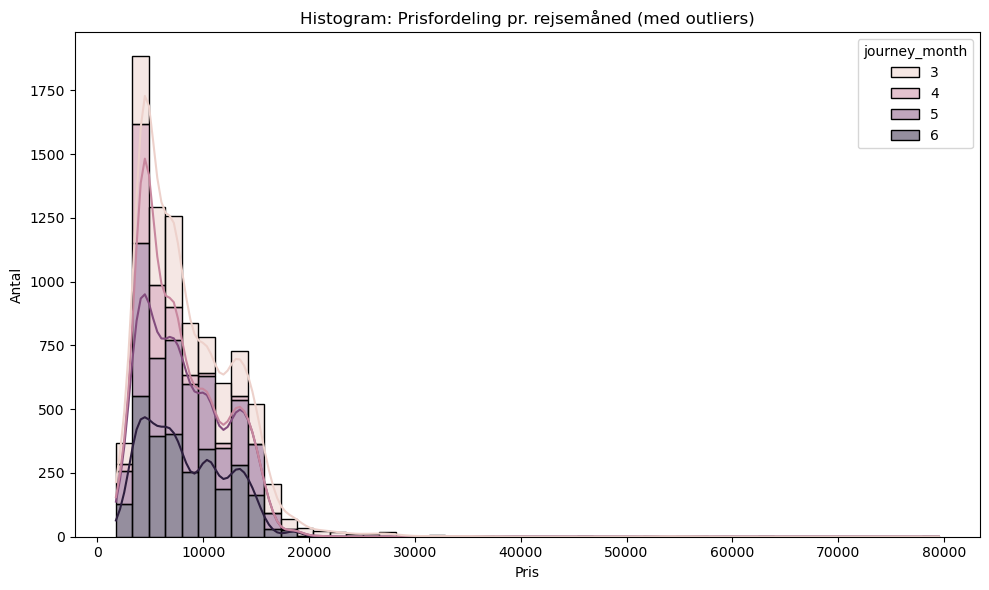

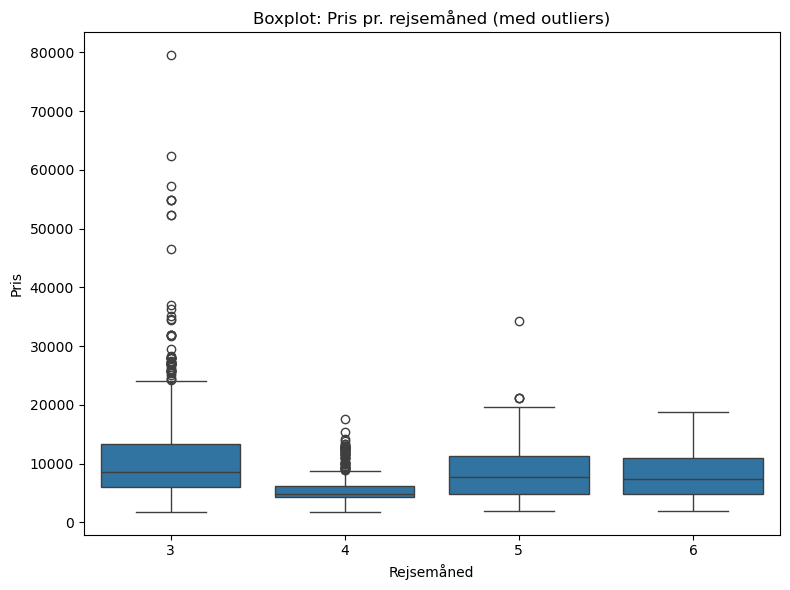

Gennemsnitspriser pr. rejsemåned (med outliers):
3: 10134.81
4: 5471.87
5: 8333.68
6: 8229.98


In [30]:
# Scatterplot: price vs journey_month
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='journey_month', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. rejsemåned (med outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. rejsemåned
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='journey_month', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. rejsemåned (med outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. rejsemåned
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='journey_month', y='price')
plt.title('Boxplot: Pris pr. rejsemåned (med outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

mean_prices = df.groupby('journey_month')['price'].mean().sort_index()

print("Gennemsnitspriser pr. rejsemåned (med outliers):")
for month, pris in mean_prices.items():
    print(f"{month}: {pris:.2f}")



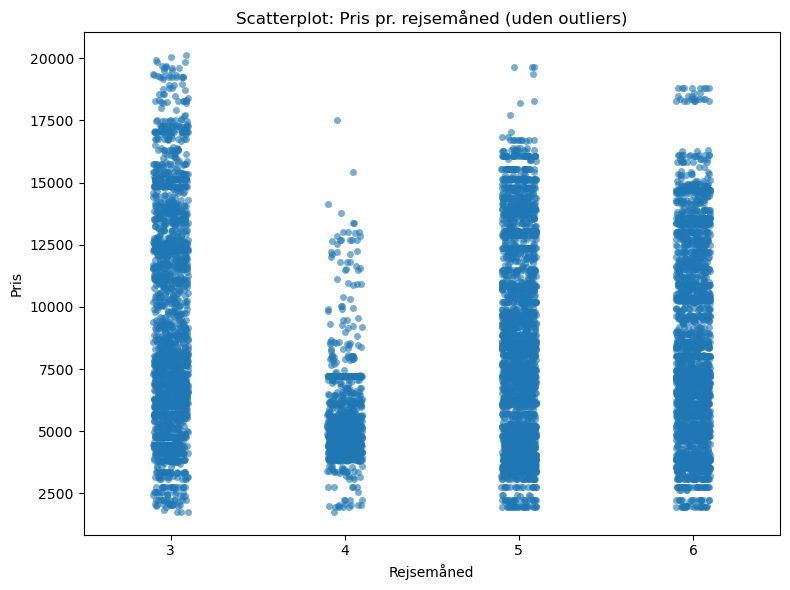

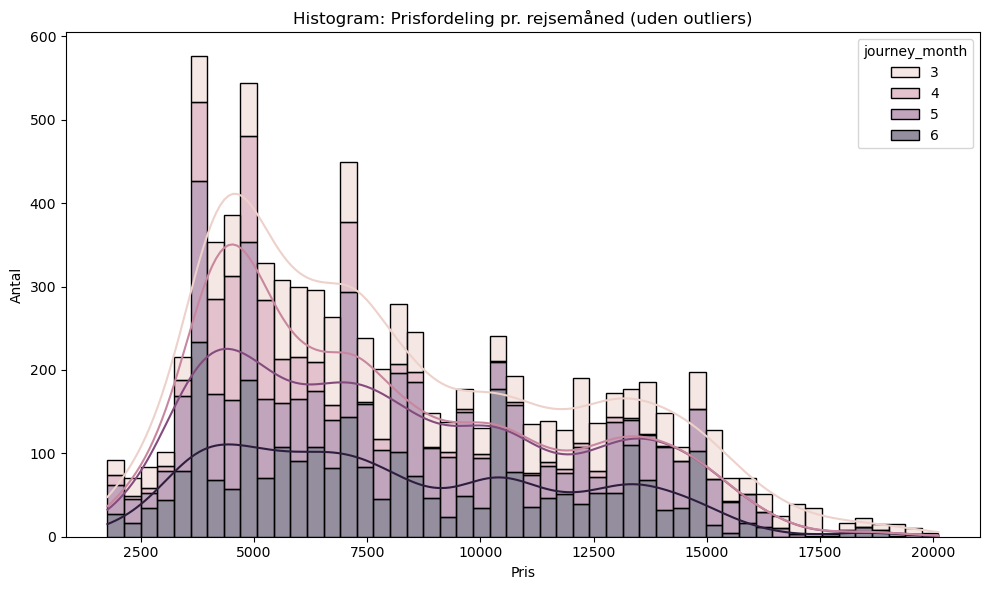

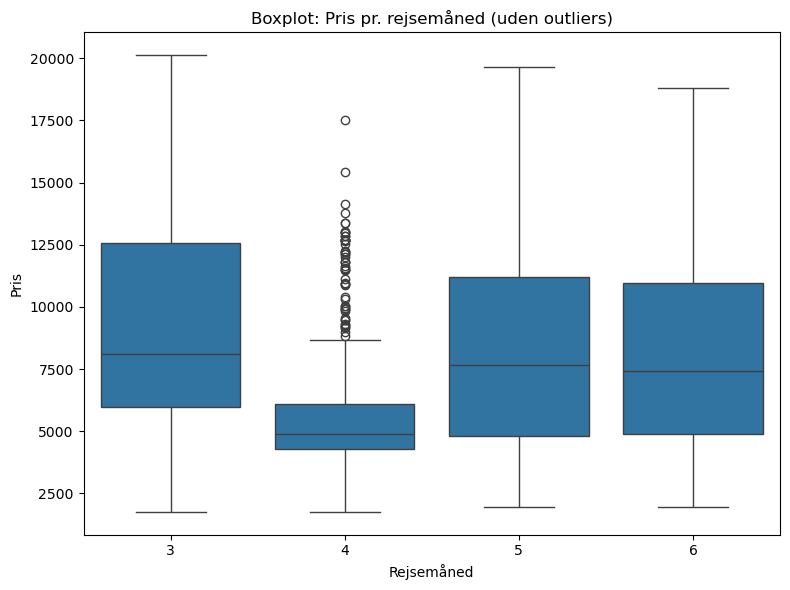

Gennemsnitspriser pr. rejsemåned (uden outliers):
3: 9286.19
4: 5471.87
5: 8309.96
6: 8229.98


In [31]:
# Scatterplot: price vs journey_month
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_final, x='journey_month', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. rejsemåned (uden outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. rejsemåned
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='price', hue='journey_month', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. rejsemåned (uden outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. rejsemåned
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final, x='journey_month', y='price')
plt.title('Boxplot: Pris pr. rejsemåned (uden outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Gennemsnitspriser pr. rejsemåned
mean_prices = df_final.groupby('journey_month')['price'].mean().sort_index()

print("Gennemsnitspriser pr. rejsemåned (uden outliers):")
for month, pris in mean_prices.items():
    print(f"{month}: {pris:.2f}")


Priserne varierer tydeligt afhængigt af rejsemåneden. Den laveste gennemsnitspris findes i april (måned 4) med cirka 5.472, hvilket tyder på, at det er en mere økonomisk måned at rejse i. Priserne stiger markant i maj og juni (måneder 5 og 6) til omkring 8.300-8.230, hvilket indikerer øget efterspørgsel eller sæsonbestemte prisstigninger i disse måneder. Den højeste gennemsnitspris observeres i marts (måned 3) med cirka 9.286 uden outliers og endnu højere (ca. 10.135) når outliers inkluderes. Dette antyder, at rejser i marts generelt er dyrere, muligvis grundet ferieperioder eller andre faktorer, der påvirker efterspørgslen. 

Samlet set viser analysen, at rejsemåneden har en væsentlig indflydelse på prisniveauet især skiller marts sig ud som den dyreste måned, mens april fremstår som den billigste.

Korrelationsmatrix mellem pris og rejsemåned:
                  price  journey_month
price          1.000000      -0.110887
journey_month -0.110887       1.000000


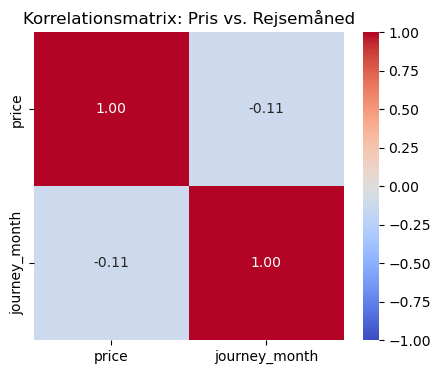

In [33]:
# Udvælg relevante kolonner
cols_to_corr = ['price', 'journey_month']

# Beregn korrelationsmatrix
corr = df[['price', 'journey_month']].corr()

# Udskriv korrelation
print("Korrelationsmatrix mellem pris og rejsemåned:")
print(corr)

# Visualiser som heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korrelationsmatrix: Pris vs. Rejsemåned")
plt.show()


Jeg undersøgte, om der var en sammenhæng mellem hvilken måned rejsen foregår i (marts–juni) og billetprisen.
Ved at beregne korrelationen mellem journey_month og price fandt jeg en korrelation på -0.11, hvilket indikerer en svag negativ sammenhæng.
Det tyder på, at priserne generelt bliver lidt lavere, jo længere hen på foråret man rejser – fx kan marts og april have højere priser end maj og juni.
Dette kan skyldes lavere efterspørgsel senere i foråret, eller at selskaberne tilbyder flere billige billetter for at fylde sæder.

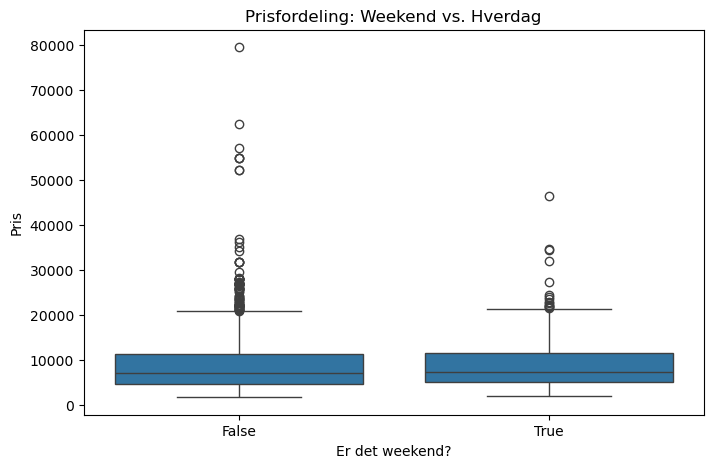

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_weekend', y='price', data=df)
plt.title('Prisfordeling: Weekend vs. Hverdag')
plt.xlabel('Er det weekend?')
plt.ylabel('Pris')
plt.show()

In [36]:
# Optæl antal rejser pr. dag i måneden
daily_counts_by_month = df.groupby(['journey_month', 'journey_day']).size()

# Optæl antal rejser pr. ugenummer
weekly_counts_by_month = df.groupby(['journey_month', 'journey_week']).size()

print("Rejser pr. dag i hver måned:\n", daily_counts_by_month)
print("Rejser pr. uge i hver måned:\n", weekly_counts_by_month)


Rejser pr. dag i hver måned:
 journey_month  journey_day
3              1              158
               3              274
               6              310
               9              277
               12              82
               15             142
               18             121
               21             346
               24             234
               27             267
4              1              177
               3              107
               6               97
               9              122
               12              63
               15              87
               18              67
               21              81
               24              91
               27              93
5              1              214
               3               90
               6              221
               9              390
               12             195
               15             326
               18             377
               21        

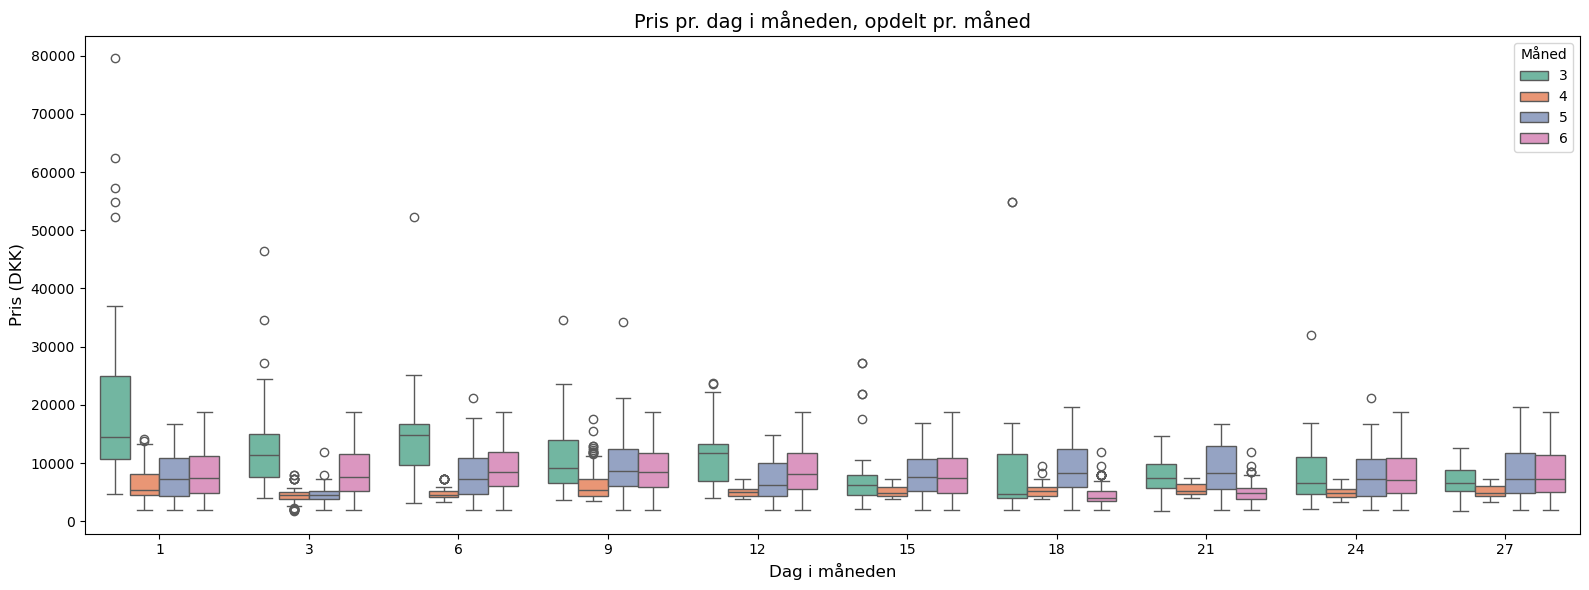

In [37]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='journey_day', y='price', hue='journey_month', palette='Set2')

plt.title('Pris pr. dag i måneden, opdelt pr. måned', fontsize=14)
plt.xlabel('Dag i måneden', fontsize=12)
plt.ylabel('Pris (DKK)', fontsize=12)
plt.legend(title='Måned', loc='upper right')
plt.tight_layout()
plt.show()

Priserne stiger systematisk hen over månederne, med lavest pris i april og højest i juni. Variationen (spredningen) i priser bliver også større, hvilket peger på mere uforudsigelige og højere rejseomkostninger i højsæsonen.

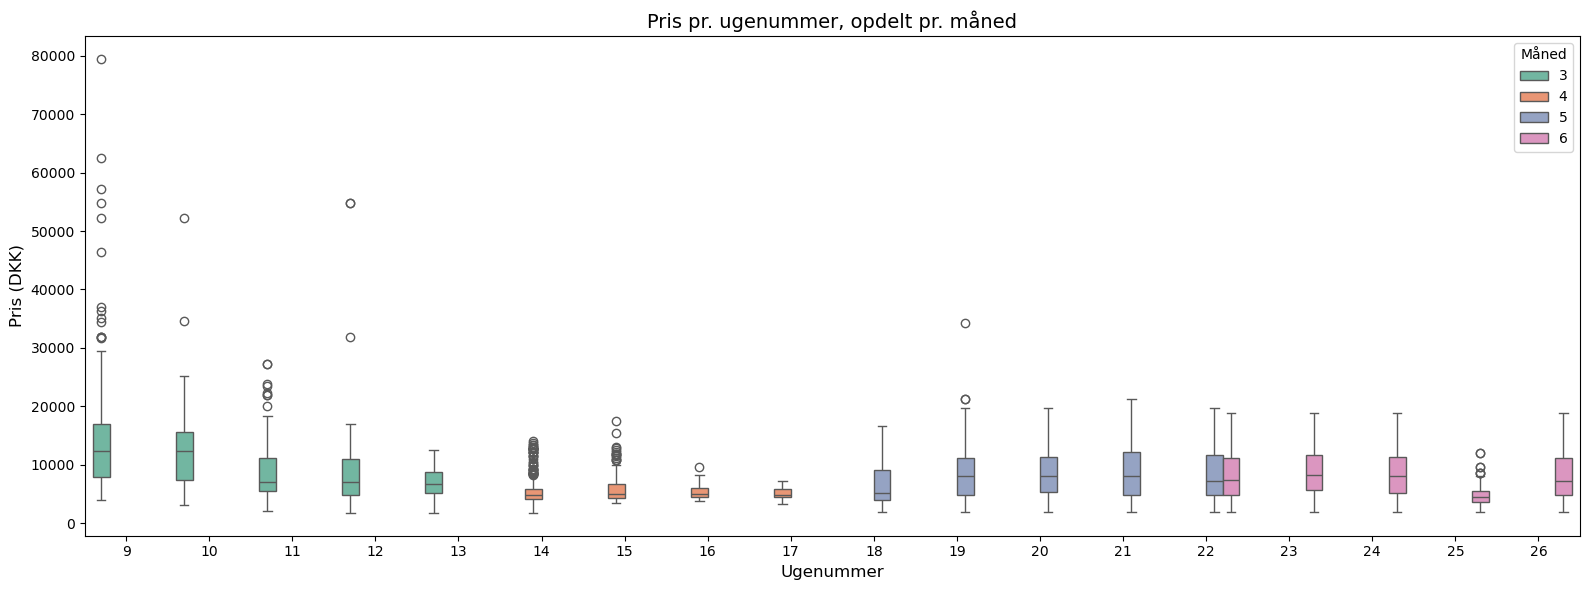

In [39]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='journey_week', y='price', hue='journey_month', palette='Set2')

plt.title('Pris pr. ugenummer, opdelt pr. måned', fontsize=14)
plt.xlabel('Ugenummer', fontsize=12)
plt.ylabel('Pris (DKK)', fontsize=12)
plt.legend(title='Måned', loc='upper right')
plt.tight_layout()
plt.show()

Ugentallene bekræfter overgangen fra lavsæson til højsæson. April er lav og stabil, mens juni er høj og ustabil – hvilket gør det dyrere og sværere at forudsige prisniveauet.

samlet konklusion: 
Prisniveauet på rejser varierer markant afhængigt af både måned og ugenummer. Den laveste pris og mindst variation ses i april, som fremstår som klar lavsæson. Herefter sker der en glidende stigning i priser gennem maj, som markerer skuldersæson, og i juni ses begyndelsen på højsæsonen, hvor både medianpriser og prisudsving er høje.
Dataene viser desuden, at højsæsonen ikke blot medfører højere gennemsnitspriser, men også større usikkerhed i prisniveauet, hvilket gør det sværere at finde billige rejser. Diagrammerne understøtter denne konklusion både på dag- og ugeniveau.

In [42]:
# Optæl rejser pr. dag i måneden (uden outliers)
daily_counts_by_month = df_final.groupby(['journey_month', 'journey_day']).size()

# Optæl rejser pr. uge i måneden (uden outliers)
weekly_counts_by_month = df_final.groupby(['journey_month', 'journey_week']).size()

# Udskriv resultaterne
print("Rejser pr. dag i hver måned (uden outliers):\n", daily_counts_by_month)
print("Rejser pr. uge i hver måned (uden outliers):\n", weekly_counts_by_month)


Rejser pr. dag i hver måned (uden outliers):
 journey_month  journey_day
3              1              102
               3              262
               6              294
               9              271
               12              79
               15             138
               18             119
               21             346
               24             233
               27             267
4              1              177
               3              107
               6               97
               9              122
               12              63
               15              87
               18              67
               21              81
               24              91
               27              93
5              1              214
               3               90
               6              220
               9              388
               12             195
               15             326
               18             377
         

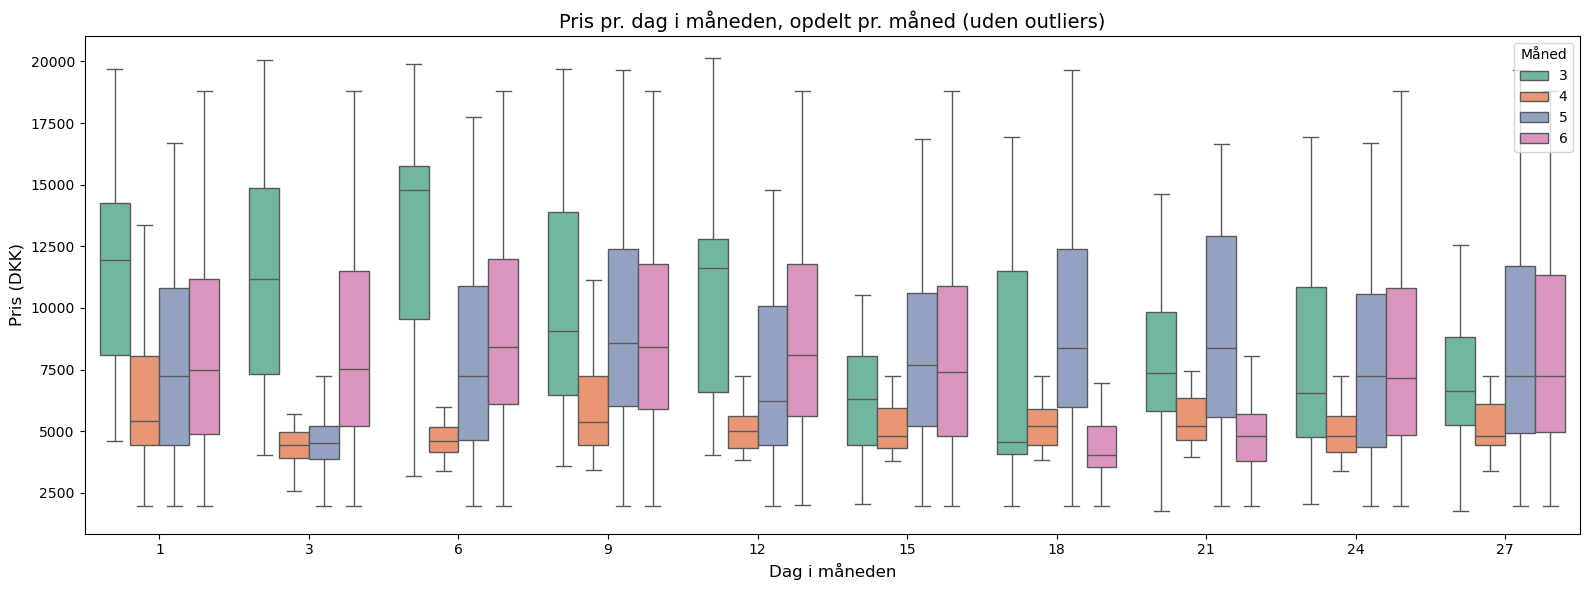

In [43]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df_final,
    x='journey_day',
    y='price',
    hue='journey_month',
    palette='Set2',
    showfliers=False  # Fjerner outliers fra boxplottet
)

plt.title('Pris pr. dag i måneden, opdelt pr. måned (uden outliers)', fontsize=14)
plt.xlabel('Dag i måneden', fontsize=12)
plt.ylabel('Pris (DKK)', fontsize=12)
plt.legend(title='Måned', loc='upper right')
plt.tight_layout()
plt.show()

Prisniveauet stiger i takt med at vi bevæger os fra forår mod sommer. Marts har høje og ustabile priser, april er stabil og lav, mens maj og især juni viser tegn på begyndende højsæson med stigende priser.

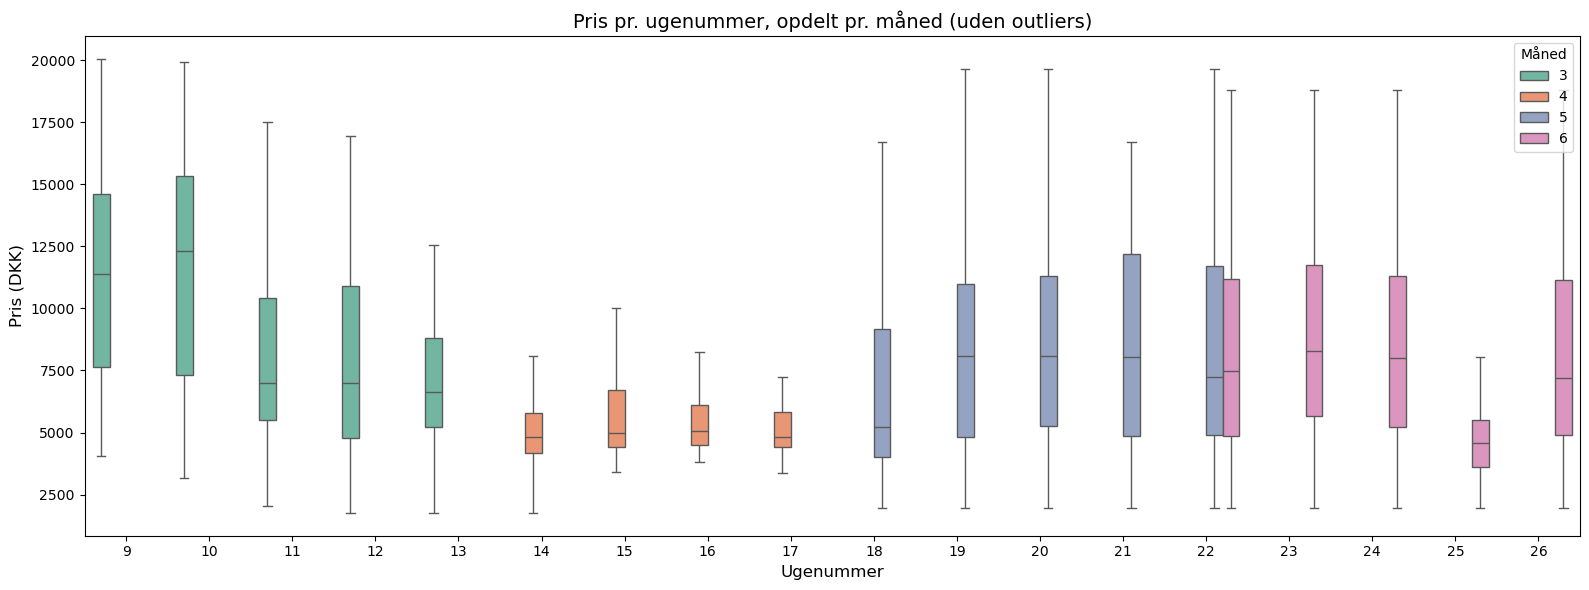

In [45]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df_final,
    x='journey_week',
    y='price',
    hue='journey_month',
    palette='Set2',
    showfliers=False  # Fjerner outliers fra boxplottet
)

plt.title('Pris pr. ugenummer, opdelt pr. måned (uden outliers)', fontsize=14)
plt.xlabel('Ugenummer', fontsize=12)
plt.ylabel('Pris (DKK)', fontsize=12)
plt.legend(title='Måned', loc='upper right')
plt.tight_layout()
plt.show()

Prisudviklingen over uger bekræfter mønstret fra dagsniveauet. Der er en tydelig lavsæson i april, hvor priserne er lavest og mest stabile. Herefter sker en gradvis stigning, som peger på indledning af højsæson i juni.

samlet konklusion: 
Rejsepriserne bevæger sig fra høje i marts, ned til et lavpunkt i april, og stiger herefter støt i maj og juni. Dette mønster indikerer, at rejsetidspunktet har markant indflydelse på prisen – og at der kan være store besparelser ved at vælge en afgang i lavsæsonen (især april).

# Sprint 3 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Superviseret læring

# Defination af features og target:

In [52]:
X = df_final[['journey_month']]
y = df_final['price']

# Split data i trænings- og testdatasæt:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oprettelse af modeller til prisforudsigelse (Lineær Regression og Random Forest)

In [56]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Træning af modeller

In [58]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Forudsigelse med de trænede modeller

In [60]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluering af modelens præcision (MAE, MSE, R²)

In [62]:
def eval_model(y_true, y_pred, model_name):
    print(f"{model_name} performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    print("-" * 40)

# Evaluer begge modeller

In [64]:
eval_model(y_test, y_pred_lr, "Linear Regression")
eval_model(y_test, y_pred_rf, "Random Forest")

Linear Regression performance:
MAE: 3327.220496067712
MSE: 15466968.657258058
R²: 0.0018847920141892294
----------------------------------------
Random Forest performance:
MAE: 3137.959095235784
MSE: 14257968.982523693
R²: 0.07990402050961909
----------------------------------------


# Linear Regression
MAE (Gennemsnitlig absolut fejl):
3.327,22
→ Det betyder, at modellen i gennemsnit rammer 3.327 kr forkert på sine forudsigelser. Det er en relativt høj fejl, hvilket tyder på, at modellen ikke er særlig præcis.

MSE (Gennemsnit af kvadrerede fejl):
15.466.968,66
→ Et højt tal, som viser, at nogle af fejlene er meget store. Da MSE kvadrerer fejlene, bliver store afvigelser ekstra straffet, og det skubber MSE op.

R²-score:
0,002
→ Det betyder, at modellen kun forklarer 0,2 % af variationen i priserne. Det er meget lavt – modellen lærer næsten intet brugbart mønster og har næsten ingen forklaringskraft.

# Random Forest
MAE:
3.137,96
→ Gennemsnitsfejlen er lidt lavere end for Linear Regression. Det viser, at modellen rammer en smule bedre.
    
MSE:
14.257.968,98
→ Stadig højt, men en lille forbedring ift. Linear Regression. Det betyder, at store fejl stadig findes, men er færre eller mindre.

R²-score:
0,080
→ Modellen forklarer nu ca. 8 % af prisvariationerne. Det er stadig lavt, men markant bedre end Linear Regression.

# Datasæt med ekstra funktioner: måned, dag og weekend

# Defination af features og target:

In [69]:
print(df[['journey_day', 'journey_month', 'is_weekend', 'airline']].head())
print(df[['journey_day', 'journey_month', 'is_weekend', 'airline']].isnull().sum())

   journey_day  journey_month  is_weekend      airline
0           24              3        True       IndiGo
1            1              5       False    Air India
2            9              6        True  Jet Airways
3           12              5        True       IndiGo
4            1              3       False       IndiGo
journey_day      0
journey_month    0
is_weekend       0
airline          0
dtype: int64


In [70]:
# One-hot encoding af 'airline'
X = pd.get_dummies(df[['journey_day', 'journey_month', 'is_weekend', 'airline']], drop_first=True)

# Målvariabel
y = df['price']

# Split data i trænings- og testdatasæt:

In [72]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Oprettelse af model til prisforudsigelse (Lineær Regression)

In [74]:
model = LinearRegression()

# Træn lineær regression

In [76]:
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))    # Gennemsnitlig absolut fejl
print("MSE:", mean_squared_error(y_test, y_pred))     # Kvadreret fejl
print("R²:", r2_score(y_test, y_pred))                # Forklaringskraft

MAE: 2501.951505179832
MSE: 11017035.49400418
R²: 0.3852300449549293


# MAE 

MAE (Mean Absolute Error): 2.501,95 kr

Modellen forudsiger priser med en gennemsnitlig fejl på ca. 2.502 kr.
Det er en relativt lav fejl, hvilket viser, at modellen giver rimeligt præcise prisforudsigelser i praksis.

# MSE

MSE (Mean Squared Error): 11.017.035

De kvadrerede fejl viser, at nogle af fejlene stadig er store, men generelt er niveauet betydeligt lavere end tidligere.
Det indikerer, at modellen sjældnere laver store fejl.

# R²

R² (Forklaringsgrad): 0,385

Modellen kan forklare ca. 38,5 % af variationen i billetpriserne.
Det er en markant forbedring sammenlignet med tidligere modeller og betyder, at modellen har fundet brugbare mønstre i data – især efter tilføjelsen af 'airline'.

In [78]:
# Vælg og vis koefficienter
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                                      Feature   Coefficient
7                airline_Jet Airways Business  51081.848704
6                         airline_Jet Airways   5793.083521
9   airline_Multiple carriers Premium economy   5700.668408
8                   airline_Multiple carriers   5676.568481
3                           airline_Air India   3920.065229
11                             airline_Trujet  -2780.796984
12                            airline_Vistara   2115.227777
13            airline_Vistara Premium economy   1799.530251
10                           airline_SpiceJet  -1049.752043
1                               journey_month   -586.121122
4                               airline_GoAir    511.063268
2                                  is_weekend    344.478936
5                              airline_IndiGo     97.914805
0                                 journey_day    -77.897693


Ved hjælp af lineær regression kan vi se, hvilke features (uafhængige variabler) der har størst indflydelse på prisen. Tabellen viser modelkoefficienterne, altså hvor meget hver variabel trækker prisen op eller ned.

Flyselskabet har den største indflydelse på billetprisen. Særligt Jet Airways Business har en markant positiv effekt på prisen med over 51.000 kr. Det bekræfter, at valg af flyselskab og billetklasse er afgørende for prissætningen.

Andre premium-klasser som ‘Multiple carriers Premium economy’ og ‘Jet Airways’ har også væsentlig indvirkning på prisniveauet.

Variable som journey_month, journey_day og is_weekend har kun en begrænset effekt på prisen. Rejsemåneden (journey_month) viser en svag negativ koefficient, hvilket ikke entydigt underbygger hypotesen om, at priserne stiger i højsæsonen.

Weekendrejser (is_weekend) har en lille positiv effekt, hvilket kan indikere en lettere stigning i pris i weekender.

# Prisforudsigelse med Random Forest

In [151]:
# Nye rejsemåneder
new_months = pd.DataFrame({'journey_month': [3, 4, 5, 6]}) 
new_predictions = rf.predict(new_months)

print("Prisforudsigelser for nye rejsemåneder (Random Forest):")
for month, price in zip(new_months['journey_month'], new_predictions):
    print(f"Måned {month}: {round(price, 2)} DKK")

Prisforudsigelser for nye rejsemåneder (Random Forest):
Måned 3: 9299.2 DKK
Måned 4: 5515.97 DKK
Måned 5: 8306.99 DKK
Måned 6: 8247.37 DKK


# Ikke-superviseret læring 

# Flypriser med KMeans Clustering

In [81]:
from sklearn.cluster import KMeans

# Vælg pris-kolonnen til clustering
X_kmeans = df_final[['price']]

# Vælg antal klynger (3 er typisk: lav, mellem, høj pris)
kmeans = KMeans(n_clusters=3, random_state=42)
df_final['price_cluster'] = kmeans.fit_predict(X_kmeans)

# Visualisering af Prisgrupper pr. Rejsemåned (KMeans Clustering)

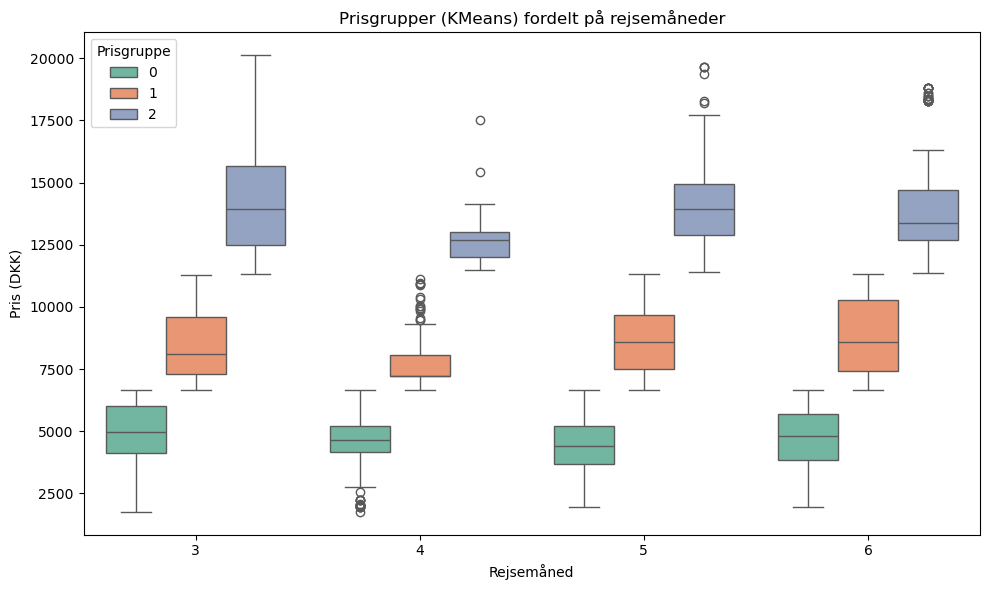

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_final, x='journey_month', y='price', hue='price_cluster', palette='Set2')
plt.title("Prisgrupper (KMeans) fordelt på rejsemåneder")
plt.xlabel("Rejsemåned")
plt.ylabel("Pris (DKK)")
plt.legend(title="Prisgruppe")
plt.tight_layout()
plt.show()

# Procentvis Fordeling af Prisgrupper pr. Rejsemåned (KMeans Clustering)

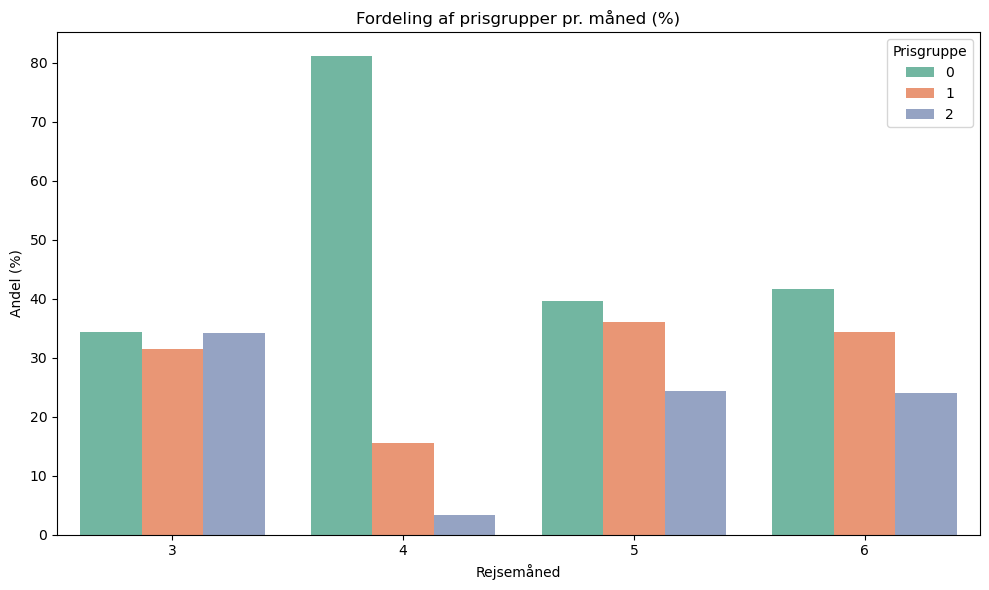

In [147]:
# Lav en procenttabel
cluster_dist = df_final.groupby(['journey_month', 'price_cluster']).size().reset_index(name='count')
cluster_dist['pct'] = cluster_dist.groupby('journey_month')['count'].transform(lambda x: x / x.sum() * 100)

# Visualiser
plt.figure(figsize=(10,6))
sns.barplot(data=cluster_dist, x='journey_month', y='pct', hue='price_cluster', palette='Set2')
plt.title("Fordeling af prisgrupper pr. måned (%)")
plt.xlabel("Rejsemåned")
plt.ylabel("Andel (%)")
plt.legend(title="Prisgruppe")
plt.tight_layout()
plt.show()


# Evaluering af resultaterne fra din KMeans-clustering

Jeg har tidligere brugt KMeans til at opdele mine flypriser i 3 klynger (fx lav, mellem og høj pris), og her vurderer du hvor godt den clustering faktisk er:

In [84]:
# Antag at du brugte KMeans til clustering og har gemt labels i 'price_cluster'
X_cluster = df_final[['price']]  # eller de features du brugte i clustering

# Beregn metrics
sil_score = silhouette_score(X_cluster, df_final['price_cluster'])
db_score = davies_bouldin_score(X_cluster, df_final['price_cluster'])

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_score)

Silhouette Score: 0.5895550827252002
Davies-Bouldin Index: 0.5142379418397568


Vurdering af KMeans model (prisgrupper)
For at tjekke om min KMeans-model laver gode og meningsfulde prisgrupper, har jeg brugt to vurderingsmål:

Silhouette Score: 0.59
Det er et godt resultat og viser, at mine prisgrupper er tydeligt adskilte. Det betyder, at hver pris hører godt til sin gruppe og ikke ligner de andre grupper.

Davies-Bouldin Index: 0.51
Dette tal skal helst være lavt, og 0.51 er rigtig fint. Det viser, at der ikke er meget overlap mellem grupperne.

Sammen med mine diagrammer (boxplot og procentfordeling), viser det, at min model har delt priserne op i tre klare grupper (lav, mellem og høj pris). De forskellige rejsemåneder har forskellige fordelinger af disse prisgrupper, hvilket bekræfter min hypotese om, at priserne er højere i højsæsonen end i lavsæsonen.